In [1]:
model_path = '/home/ec2-user/autoencoding_beyond_pixels/out/3.celeba/arch.pickle'

In [2]:
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import deeppy as dp

In [3]:
import model.aegan
with open(model_path, 'rb') as f:
    model = pickle.load(f)

In [4]:
# size of latent z vector in model
n_hidden = model.latent_encoder.n_out

In [ ]:
# draw a normal sample from z
num_samples = 1
samples_z = np.random.normal(scale=0.4, size=(num_samples, n_hidden))
imgs = model.decode(samples_z.astype(dp.float_))
for i in range(num_samples):
    img = imgs[i]
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()

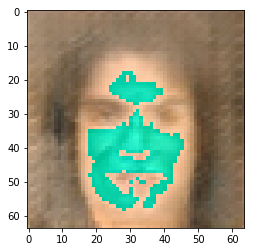

In [158]:
samples_z[0]+= np.random.normal(scale=.05, size=128)
imgs = model.decode(samples_z.astype(dp.float_))
img = imgs[0]
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)

In [159]:
samples_z[0]

array([ -2.12703391e-01,   1.36888827e-01,   1.28281438e-01,
        -5.07212054e-02,  -3.13895724e-01,   2.67219034e-01,
        -2.99827817e-01,  -2.59885924e-01,   4.67304784e-01,
         3.19169679e-01,  -1.11255492e-01,   8.08731289e-01,
         2.60687962e-02,   9.45678958e-02,   3.03013882e-01,
         1.02914187e-01,   2.90501307e-01,  -5.08248956e-02,
         1.62898737e-01,   4.48603120e-01,  -1.91167008e-01,
        -1.98684706e-01,  -3.00951792e-01,  -5.13074681e-01,
         3.83395676e-01,  -2.88158882e-02,   3.77844704e-01,
        -1.82593165e-01,   9.84014483e-02,  -2.19818057e-01,
         2.89945411e-01,  -4.18862799e-01,  -3.45853432e-01,
        -4.50805982e-01,   7.39251157e-01,   1.61982809e-01,
        -4.27764683e-03,  -8.13829642e-02,  -3.43701780e-01,
         2.47745810e-01,   1.52143145e-01,  -4.27364876e-01,
         1.63293290e-01,   6.32036200e-02,   1.52583965e-01,
         2.03857489e-02,  -3.45132067e-01,  -1.15105068e-01,
        -1.14100786e-01,

In [179]:
from skimage.transform import resize
from skimage.util import crop
import deeppy as dp

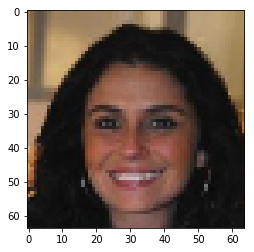

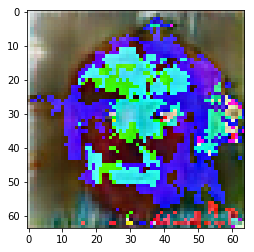

In [227]:
timg = sp.misc.imread('/home/ec2-user/autoencoding_beyond_pixels/datasets/celeba/img_align_celeba/001682.jpg')

# resize image so shorter dim is same as what model expects
dims = np.array(timg[:,:,0].shape)
scale = model_img_size / min(dims)
new_dims = (scale * dims).astype('int_')
img_resized = resize(timg, new_dims)

# now figure out which is longer dim and crop it to what model expects
long_dim = np.argmax(new_dims)
long_dim_len = max(new_dims)
long_crop = int((long_dim_len - model_img_size)/2)
# assume the crop is the first dim
crops = [[long_crop, long_crop], [0, 0]]
# swap if it's not
if (long_dim == 1): crops = list(reversed(crops))
# add a crop of 0 for third dim (which is really the channels dim)
# crop fn wants list of lists, with inner list amount to cut at 
# each edge of the dim
crops = crops + [[0, 0]]
img_cropped = crop(img_resized, crops)

# model wants channels dim first
img_for_model = np.transpose(img_cropped, (2, 0, 1))
imgs_for_model = np.expand_dims(img_for_model, axis=0)
imgs_for_model = imgs_for_model.astype(dp.float_)

decoded = model.decode(model.encode(imgs_for_model))

plt.imshow(img_cropped)
plt.show()

plt.imshow(np.transpose(decoded[0], (1, 2, 0)))
plt.show()